In [1]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
credentials = ServiceAccountCredentials.from_json_keyfile_name(
    "../../gckey.json",
    [
        "https://spreadsheets.google.com/feeds",
        "https://www.googleapis.com/auth/drive",
    ],
)
client = gspread.authorize(credentials)
spreadsheet = client.open("MaLA data mixing ablation")
Belebele_Llama_Stagnant = spreadsheet.worksheet("Belebele-3shots-Llama-3.1-8B-Stagnant")

In [4]:
Belebele_Llama_Stagnant_Data = Belebele_Llama_Stagnant.get_all_records(value_render_option="UNFORMATTED_VALUE")
df = pd.DataFrame(Belebele_Llama_Stagnant_Data, columns=Belebele_Llama_Stagnant_Data[0])
df = df.replace('', np.nan)

/tmp/ipykernel_741626/4153634378.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('', np.nan)


In [5]:
df

,Languages,Model,checkpoint-500,checkpoint-1000,checkpoint-1500,checkpoint-2000,checkpoint-2500,checkpoint-3000,checkpoint-3500
0,All,Llama-3.1-8B-Bilingual-Stagnant,0.38066,0.37622,0.34424,0.35292,0.35754,0.34308,NaN
1,All,Llama-3.1-8B-Bilingual-Code-Stagnant,0.40644,0.38868,0.41956,0.39690,0.38178,0.40268,0.38934
2,All,Llama-3.1-8B-Monolingual-Stagnant,0.43778,0.39424,0.47732,0.48000,0.47578,0.47958,NaN
3,All,Llama-3.1-8B-Monolingual-Code-Stagnant,0.48266,0.49178,0.47732,0.46978,0.45998,0.46224,0.46998
4,High,Llama-3.1-8B-Bilingual-Stagnant,0.62780,0.56330,0.51890,0.48670,0.49440,0.47440,NaN
5,High,Llama-3.1-8B-Bilingual-Code-Stagnant,0.74440,0.68330,0.69670,0.65440,0.65000,0.67560,0.66670
6,High,Llama-3.1-8B-Monolingual-Stagnant,0.79220,0.72000,0.74780,0.73890,0.74440,0.74780,NaN
7,High,Llama-3.1-8B-Monolingual-Code-Stagnant,0.80890,0.79330,0.76440,0.74780,0.72440,0.73670,0.74440
8,Medium,Llama-3.1-8B-Bilingual-Stagnant,0.35555,0.35835,0.32670,0.35560,0.35500,0.33830,NaN
9,Medium,Llama-3.1-8B-Bilingual-Code-Stagnant,0.36220,0.33945,0.38725,0.35670,0.32830,0.36555,0.34610


In [6]:
df_dropped = df.drop(columns=["Languages"])
df_all, df_high, df_medium, df_low = [df_dropped.iloc[i:i+4] for i in range(0, len(df_dropped), 4)]

In [7]:
df_all

,Model,checkpoint-500,checkpoint-1000,checkpoint-1500,checkpoint-2000,checkpoint-2500,checkpoint-3000,checkpoint-3500
0,Llama-3.1-8B-Bilingual-Stagnant,0.38066,0.37622,0.34424,0.35292,0.35754,0.34308,NaN
1,Llama-3.1-8B-Bilingual-Code-Stagnant,0.40644,0.38868,0.41956,0.39690,0.38178,0.40268,0.38934
2,Llama-3.1-8B-Monolingual-Stagnant,0.43778,0.39424,0.47732,0.48000,0.47578,0.47958,NaN
3,Llama-3.1-8B-Monolingual-Code-Stagnant,0.48266,0.49178,0.47732,0.46978,0.45998,0.46224,0.46998


In [8]:
model_info = {
    "Llama-3.1-8B-Bilingual-Code-Stagnant": {
        "final_ckpt": 3500,
        "total_tokens": 300e6,  # 300M
    },
    "Llama-3.1-8B-Monolingual-Code-Stagnant": {
        "final_ckpt": 3500,
        "total_tokens": 300e6,  # 300M
    },
    "Llama-3.1-8B-Bilingual-Stagnant": {
        "final_ckpt": 3000, 
        "total_tokens": 200e6   # 200M
    },  
    "Llama-3.1-8B-Monolingual-Stagnant": {
        "final_ckpt": 3000,
        "total_tokens": 200e6,  # 200M
    },
}


def ckpt_to_tokens(model_name: str, ckpt: int) -> float:
    """
    Given model name and checkpoint numbers, return the corresponding number of trained tokens.
    """
    info = model_info[model_name]
    final_ckpt = info["final_ckpt"]
    total_tokens = info["total_tokens"]
    if ckpt > final_ckpt:
        ckpt = final_ckpt

    return ckpt * (total_tokens / final_ckpt)

checkpoint_cols = [col for col in df.columns if col.startswith("checkpoint-")]

In [9]:
def vis(df, langs_catagory):
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(10, 6), dpi=120)

    for i, row in df.iterrows():
        model_name = row["Model"]
        if model_name not in model_info:
            continue

        ckpt_bleu_pairs = []
        for col in checkpoint_cols:
            val = row[col]
            if pd.notna(val) and val != "":
                ckpt = int(col.split("-")[1])
                x_tokens = ckpt_to_tokens(model_name, ckpt)
                y_bleu = float(val)
                ckpt_bleu_pairs.append((x_tokens, y_bleu))

        ckpt_bleu_pairs.sort(key=lambda x: x[0])

        xs = [p[0] for p in ckpt_bleu_pairs]
        ys = [p[1] for p in ckpt_bleu_pairs]

        plt.plot(
            xs, ys, marker="o", linestyle="-", linewidth=2, markersize=5, label=model_name
        )

    plt.xlabel("Training Tokens", fontsize=12)
    plt.ylabel("Acc", fontsize=12)
    plt.title(f"Acc({langs_catagory}) vs. Training Tokens", fontsize=14, fontweight="bold")

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(loc="best", fontsize=10)
    plt.tight_layout()

    plt.show()

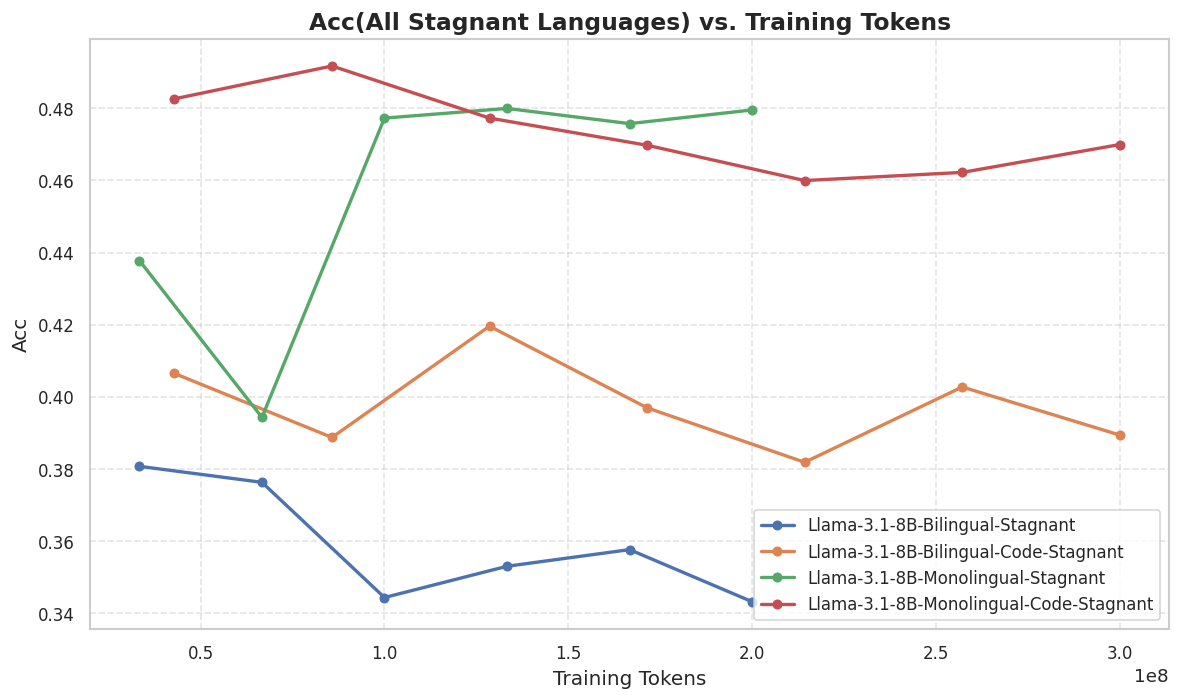

In [10]:
vis(df_all, "All Stagnant Languages")

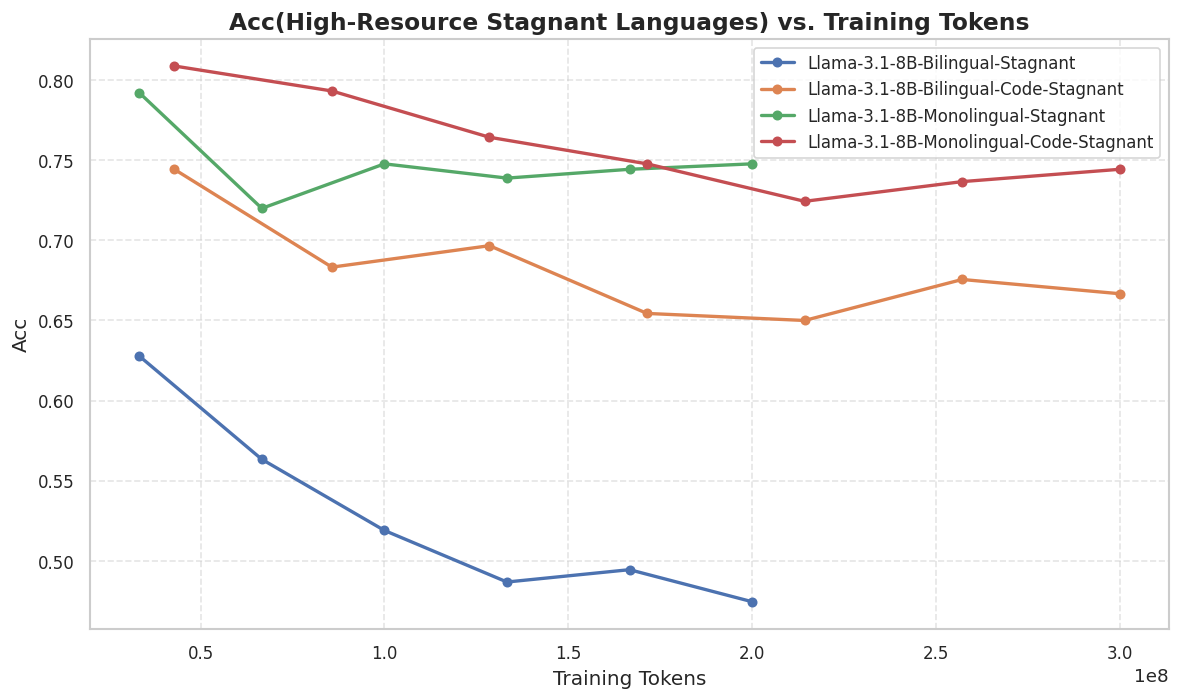

In [11]:
vis(df_high, "High-Resource Stagnant Languages")

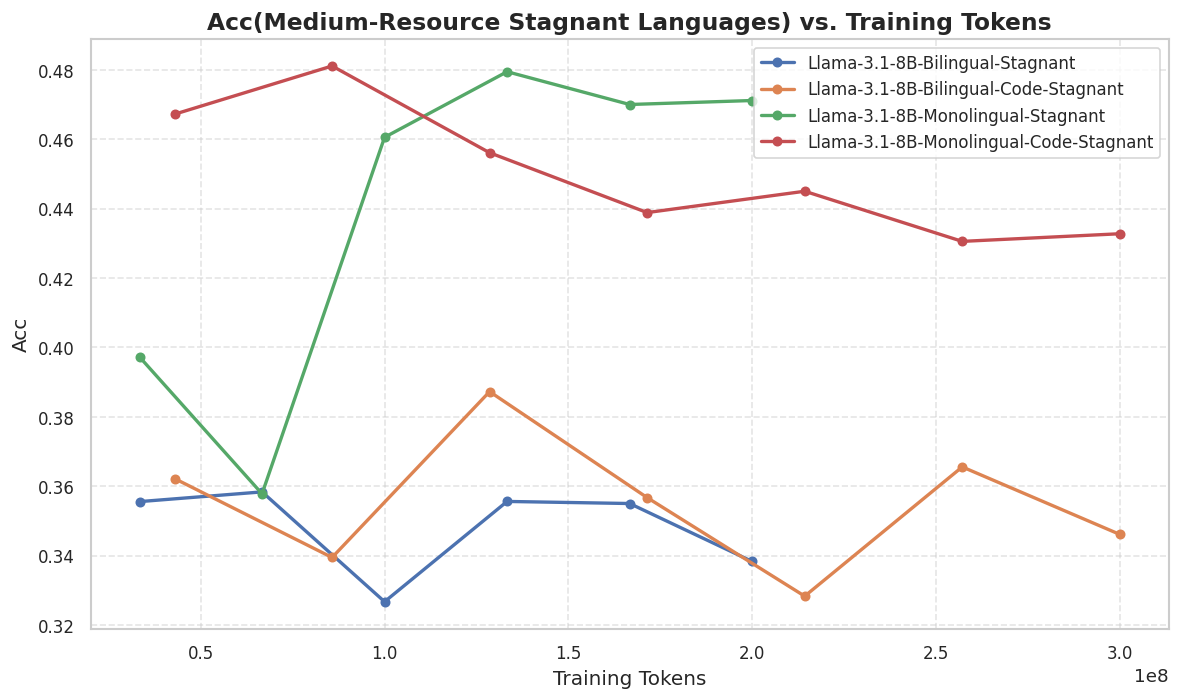

In [12]:
vis(df_medium, "Medium-Resource Stagnant Languages")

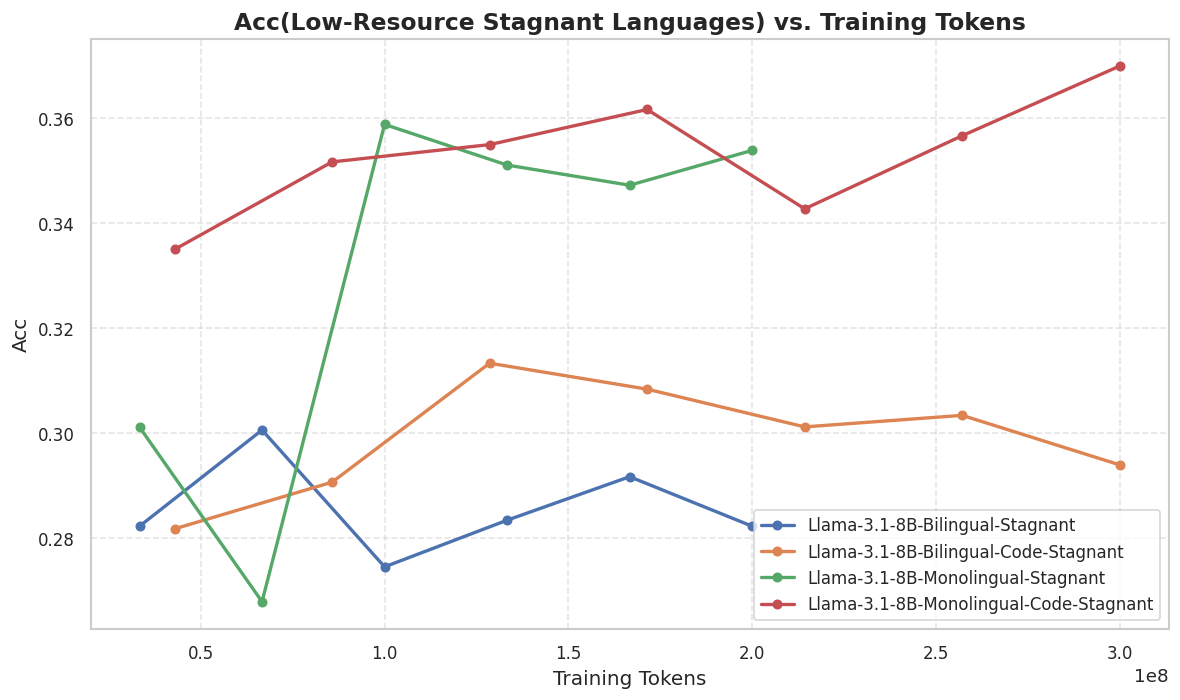

In [13]:
vis(df_low, "Low-Resource Stagnant Languages")